# Alexnet

https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

![alexnet](resources/images/M_3/alex.png)

|   |       Layer       | Input Shape | No of Neurons | Kernel Size | Stride | Padding | Output Shape | Activation |
|---|:-----------------:|-------------|:-------------:|:-----------:|:------:|:-------:|:------------:|------------|
| 0 | Input             | (227,227,3) |       --      |      --     |   --   |    --   | (227,227,3)  |     --     |
| 1 | Convolution 1     | (227,227,3) |       96      |   11 x 11   |    4   |    --   | (55,55,96)   |    ReLU    |
|   | Max Pooling 1     | (55,55,96)  |       --      |    3 x 3    |    2   |    --   | (27,27,96)   |     --     |
| 2 | Convolution 2     | (27,27,96)  |      256      |    5 x 5    |    1   |    2    | (27,27,256)  |    ReLU    |
|   | Max Pooling 2     | (27,27,256) |       --      |    3 x 3    |    2   |    --   | (13,13,256)  |     --     |
| 3 | Convolution 3     | (13,13,256) |      384      |    3 x 3    |    1   |    1    | (13,13,384)  |    ReLU    |
| 4 | Convolution 4     | (13,13,384) |      384      |    3 x 3    |    1   |    1    | (13,13,384)  |    ReLU    |
| 5 | Convolution 5     | (13,13,384) |      256      |    3 x 3    |    1   |    1    | (13,13,256)  |    ReLU    |
|   | Max Pooling 3     | (13,13,256) |       --      |    3 x 3    |    2   |    --   | (6,6,256)    |     --     |
| 6 | Fully Connected 1 | 9216        |               |             |        |         | 4096         |    RelU    |
| 7 | Fully Connected 2 | 4096        |               |             |        |         | 4096         |    ReLU    |
| 8 | Fully Connected 3 | 4096        |               |             |        |         | 1000         | SoftMax    |

In [1]:
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


np.random.seed(1000)
# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
tf.config.experimental.set_memory_growth(gpu_device[0], True)

Number of GPU = 1


In [3]:
pickle_in = open("./resources/data/bird/X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("./resources/data/bird/Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

pickle_in = open("./resources/data/bird/X_valid.pickle","rb")
X_valid = pickle.load(pickle_in)

pickle_in = open("./resources/data/bird/Y_valid.pickle","rb")
Y_valid = pickle.load(pickle_in)

pickle_in = open("./resources/data/bird/X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("./resources/data/bird/Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")
print(f"X_valid= {X_valid.shape} Y_valid= {Y_valid.shape}")
print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_train= (6853, 227, 227, 3) Y_train= (6853,)
X_valid= (250, 227, 227, 3) Y_valid= (250,)
X_test= (250, 227, 227, 3) Y_test= (250,)


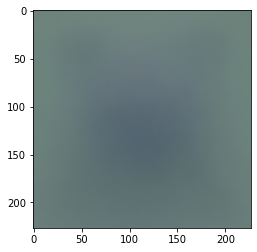

In [4]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [5]:
X_train_norm, X_valid_norm, X_test_norm = X_train-mean_img, X_valid-mean_img, X_test-mean_img

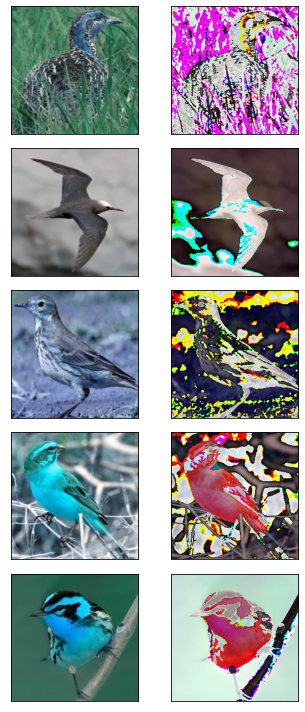

In [6]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [7]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train.shape[1:]),
    
    
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(50),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0

In [8]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [9]:
h = model.fit(x=X_train_norm, y=Y_train, epochs=100, validation_data=(X_valid_norm, Y_valid), batch_size=32)

Epoch 1/100
215/215 [==============================] - 35s 73ms/step - loss: 4.2278 - accuracy: 0.0790 - val_loss: 2.8065 - val_accuracy: 0.2640
Epoch 2/100
215/215 [==============================] - 10s 44ms/step - loss: 3.3426 - accuracy: 0.1954 - val_loss: 2.3646 - val_accuracy: 0.3920
Epoch 3/100
215/215 [==============================] - 9s 44ms/step - loss: 2.8283 - accuracy: 0.2979 - val_loss: 1.9927 - val_accuracy: 0.4840
Epoch 4/100
215/215 [==============================] - 9s 43ms/step - loss: 2.4452 - accuracy: 0.3645 - val_loss: 1.7708 - val_accuracy: 0.5120
Epoch 5/100
215/215 [==============================] - 9s 43ms/step - loss: 2.1134 - accuracy: 0.4347 - val_loss: 1.5418 - val_accuracy: 0.5840
Epoch 6/100
215/215 [==============================] - 9s 43ms/step - loss: 1.8026 - accuracy: 0.5032 - val_loss: 1.3665 - val_accuracy: 0.6440
Epoch 7/100
215/215 [==============================] - 9s 44ms/step - loss: 1.5329 - accuracy: 0.5764 - val_loss: 1.3521 - val_accurac

215/215 [==============================] - 9s 41ms/step - loss: 0.0930 - accuracy: 0.9726 - val_loss: 1.3375 - val_accuracy: 0.7320
Epoch 58/100
215/215 [==============================] - 9s 42ms/step - loss: 0.0482 - accuracy: 0.9849 - val_loss: 1.3092 - val_accuracy: 0.7760
Epoch 59/100
215/215 [==============================] - 9s 42ms/step - loss: 0.0966 - accuracy: 0.9643 - val_loss: 1.3406 - val_accuracy: 0.7400
Epoch 60/100
215/215 [==============================] - 9s 41ms/step - loss: 0.0835 - accuracy: 0.9729 - val_loss: 1.5298 - val_accuracy: 0.7720
Epoch 61/100
215/215 [==============================] - 9s 43ms/step - loss: 0.0715 - accuracy: 0.9735 - val_loss: 1.5821 - val_accuracy: 0.7440
Epoch 62/100
215/215 [==============================] - 9s 42ms/step - loss: 0.1165 - accuracy: 0.9649 - val_loss: 1.4112 - val_accuracy: 0.7440
Epoch 63/100
215/215 [==============================] - 9s 42ms/step - loss: 0.1674 - accuracy: 0.9490 - val_loss: 1.4689 - val_accuracy: 0.728

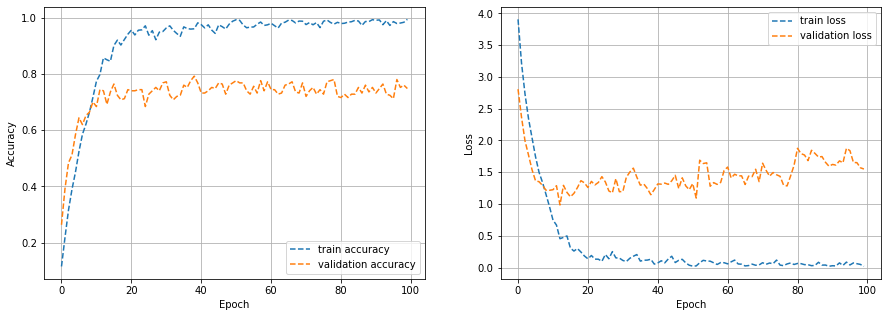

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--', label='train accuracy')
plt.plot(h.history['val_accuracy'], '--', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--', label='train loss')
plt.plot(h.history['val_loss'], '--', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [11]:
test_loss, test_acc = model.evaluate(X_test_norm, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

8/8 [==============================] - 0s 18ms/step - loss: 1.8437 - accuracy: 0.7560

Test Accuracy: 0.7559999823570251

Test Loss: 1.843672752380371
